In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

# Load your dataset
Swiggy = pd.read_csv(r"E:\Swiggy_data.csv")

# Function to remove outliers using the IQR method
def remove_outliers(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

# Remove outliers from the 'Price' column
if 'Price' in Swiggy.columns:
    Swiggy = remove_outliers(Swiggy, 'Price')

# Remove outliers from the 'Delivery_Time' column
if 'Delivery_Time' in Swiggy.columns:
    Swiggy = remove_outliers(Swiggy, 'Delivery_Time')

# Print the cleaned data summary
print(Swiggy.describe())

# Save the cleaned data if needed
Swiggy.to_csv('cleaned_Swiggy_data.csv', index=False)


                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8091.000000  8091.000000  8073.000000    8087.000000    8091.000000
mean   249741.764182   299.272649     3.637371     159.633980      53.668768
std    157594.050418   127.804596     0.644660     402.606508      14.324201
min       211.000000     0.000000     2.000000      20.000000      20.000000
25%     81104.000000   200.000000     2.900000      50.000000      44.000000
50%    291769.000000   300.000000     3.800000      80.000000      52.000000
75%    396659.000000   400.000000     4.200000     100.000000      63.000000
max    466928.000000   700.000000     5.000000   10000.000000     109.000000


In [4]:
Swiggy.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100.0,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100.0,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100.0,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500.0,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50.0,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


### Analyze and visualize the distribution of food item prices from the Swiggy dataset to identify price trends and patterns.

Detailed Explanation:
The provided code snippet aims to create a histogram that displays how food item prices are distributed within the Swiggy dataset. This helps in understanding the frequency of different price ranges and identifying any patterns such as price clustering, skewness, or outliers.

Problem to Solve:
"Determine the distribution of food item prices in the Swiggy dataset to gain insights into the typical price range, identify common pricing trends, and detect any anomalies or outliers that could impact business analysis."

This analysis can inform business decisions such as pricing strategies, promotions, and market segmentation.

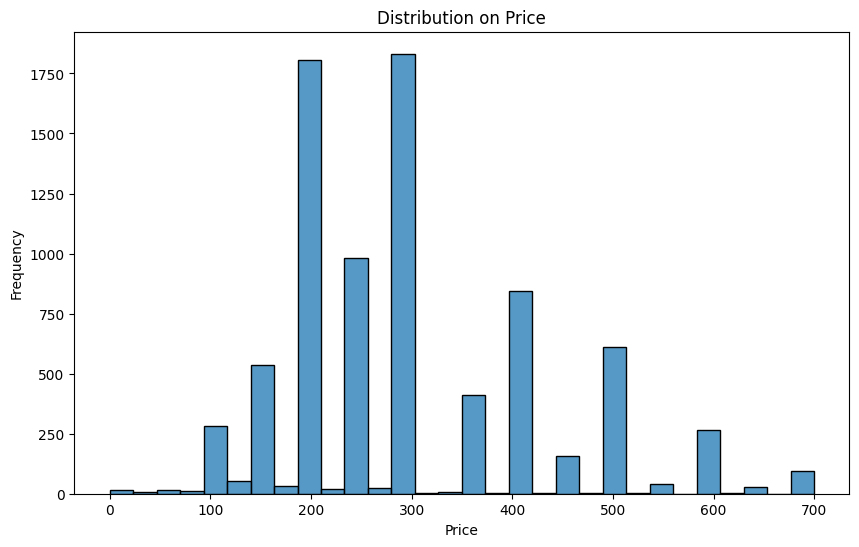

In [5]:

plt.figure(figsize=(10, 6))
sns.histplot(Swiggy['Price'], bins=30, kde=False)
plt.title('Distribution on Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

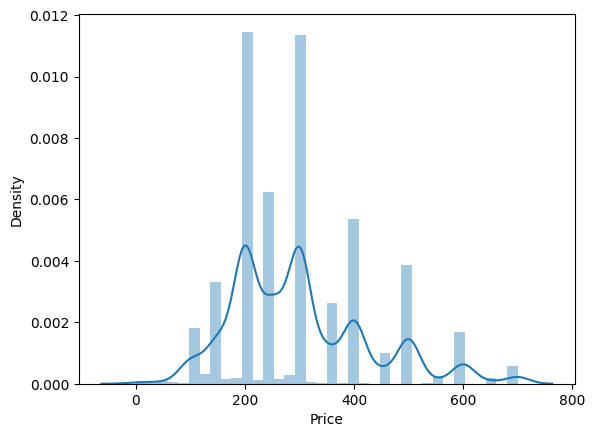

In [6]:
sns.distplot(Swiggy['Price'])

### Analyze and visualize the distribution of delivery times in the Swiggy dataset to understand the frequency and variability of delivery durations.

Detailed Explanation:
The code snippet provided creates a histogram that displays how delivery times are distributed within the Swiggy dataset. This visualization helps in identifying patterns such as the most common delivery times, the spread of delivery durations, and potential outliers.

Problem to Solve:
"Investigate the distribution of delivery times in the Swiggy dataset to understand the typical delivery duration, detect any common trends, and identify unusual delays or outliers that could impact customer satisfaction and operational efficiency."

This analysis can provide insights to optimize delivery logistics, enhance customer experience, and improve service quality by addressing inefficiencies.

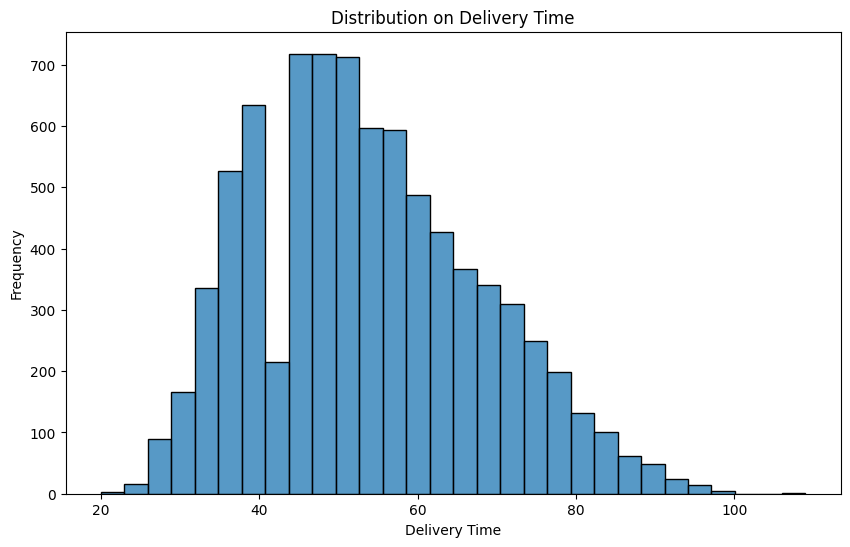

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(Swiggy['Delivery time'], bins=30, kde=False)
plt.title('Distribution on Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Delivery time', ylabel='Density'>

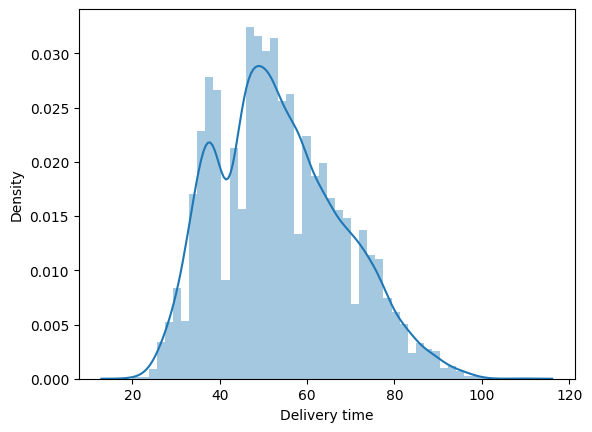

In [9]:
sns.distplot(Swiggy['Delivery time'])

### Analyze and visualize the distribution of the number of restaurants across different cities in the Swiggy dataset to identify which cities have the highest and lowest restaurant counts.

Detailed Explanation:
The provided code snippet generates a count plot that shows the number of restaurants per city within the Swiggy dataset. By using the value_counts() function to order the cities, the visualization highlights which cities have the most and the fewest restaurants, making it easy to compare the restaurant density across locations.

Problem to Solve:
"Determine the distribution of restaurants across various cities in the Swiggy dataset to identify cities with high restaurant density and those with fewer options, which can inform market analysis, expansion strategies, and resource allocation."

This analysis helps Swiggy understand market saturation, identify potential areas for growth, and allocate resources more effectively based on city-specific restaurant availability.

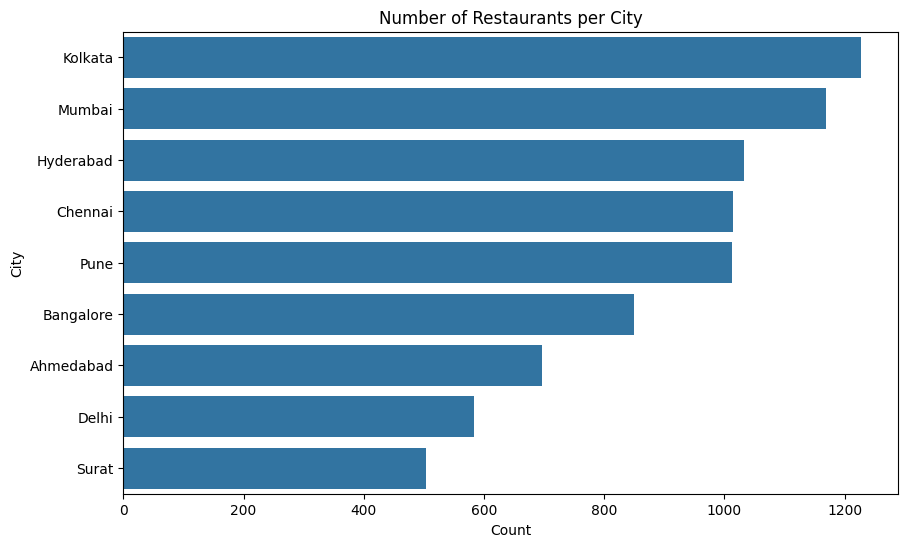

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=Swiggy, order=Swiggy['City'].value_counts().index)
plt.title('Number of Restaurants per City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

### Analyze and visualize the relationship between the price of food items and their average ratings across different cities in the Swiggy dataset to understand how pricing correlates with customer satisfaction and if there are city-specific trends.

Detailed Explanation:
The provided code snippet creates a scatter plot where the x-axis represents the price of food items, and the y-axis represents their average ratings. The hue parameter differentiates data points by city, allowing for a visual comparison of trends in different cities. This helps in assessing whether higher prices correlate with better ratings or if there are variations based on the city.

Problem to Solve:
"Investigate the relationship between the price of food items and their average customer ratings in the Swiggy dataset, segmented by city, to determine if higher-priced items tend to receive better ratings, and to identify any city-specific trends or anomalies."

This analysis can guide Swiggy in understanding how pricing impacts customer perception and satisfaction, tailor pricing strategies, and identify cities where customers are more price-sensitive or willing to pay for higher-rated food.

<Axes: xlabel='Price', ylabel='Avg ratings'>

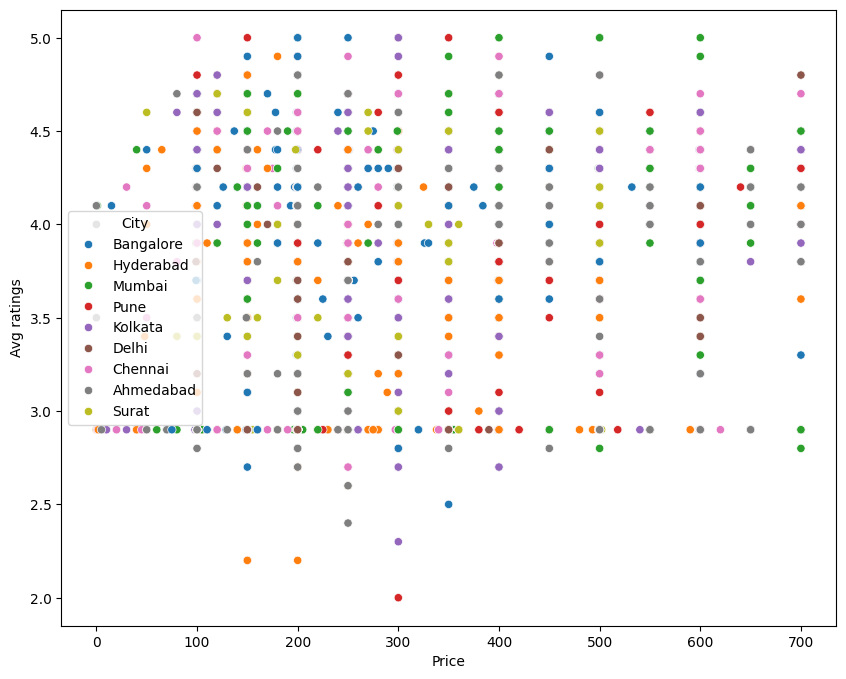

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = Swiggy['Price'],y=Swiggy['Avg ratings'] , hue = Swiggy['City'])

### Explore how delivery time affects the price of food items in different cities using the Swiggy dataset.

Explanation:
The code generates a scatter plot with delivery time on the x-axis and food item price on the y-axis. The points are colored based on the city, allowing you to see if there is any relationship between how long delivery takes and the price of food, and if this relationship varies by city.

Purpose:
"Find out if longer delivery times are linked to higher or lower food prices and see if this trend changes from one city to another."

This helps Swiggy understand if delivery time impacts food pricing and whether certain cities show different patterns, which can be useful for pricing and delivery strategy adjustments.

<Axes: xlabel='Delivery time', ylabel='Price'>

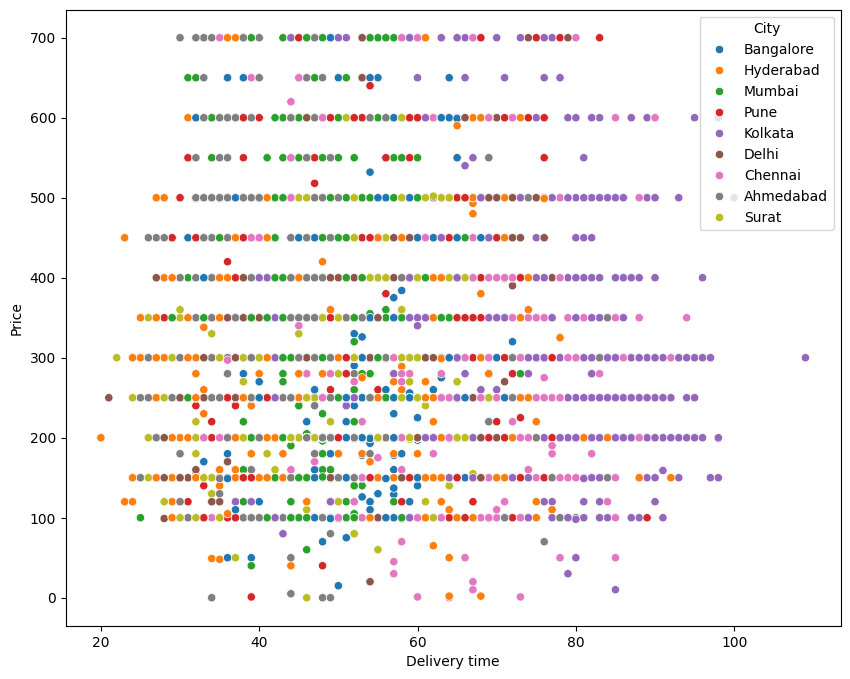

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = Swiggy['Delivery time'],y=Swiggy['Price'] ,hue = Swiggy['City'])

The objective of this analysis is to investigate the variation in food prices across different cities as reported by Swiggy. Understanding how prices differ from one city to another can provide insights into regional economic factors, consumer preferences, and market dynamics. This study utilizes boxplot visualization to highlight the distribution of food prices in various cities, aiming to identify:

Price Range: The overall range of food prices in each city, including minimum, maximum, and median prices.
Price Distribution: The spread and skewness of food prices, which may indicate the presence of outliers or unique pricing strategies.
Comparative Analysis: How cities compare against each other regarding average and extreme prices, which can inform Swiggy’s pricing strategies and promotional offers.
By examining these aspects, the analysis seeks to provide actionable insights that can help stakeholders make informed decisions related to pricing, marketing, and service delivery in the food delivery industry.

Feel free to modify any

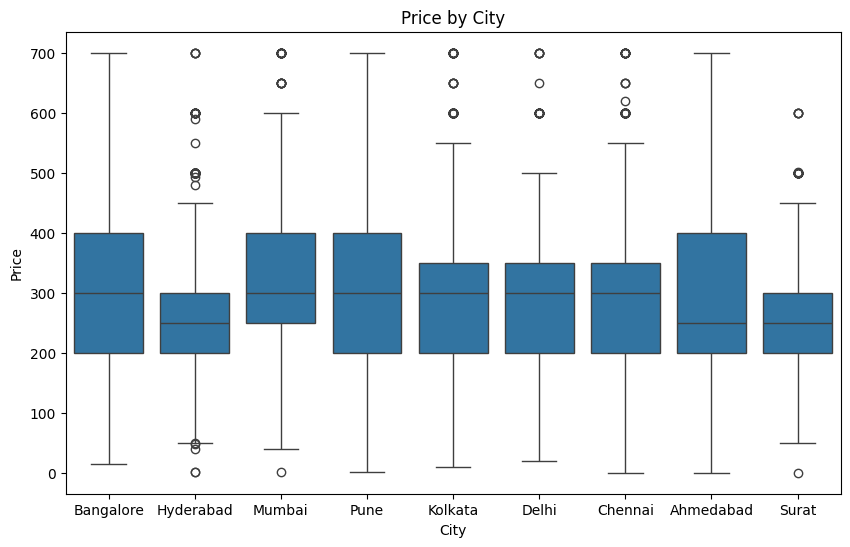

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Price', data=Swiggy)
plt.title('Price by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

### The analysis focuses on evaluating the variation in delivery times across different cities in the Swiggy dataset.

 By utilizing boxplot visualization, the study aims to identify the range and distribution of delivery times, highlighting any potential outliers. Understanding these variations can help improve delivery efficiency and enhance customer satisfaction by providing insights into operational performance in different urban areas.

Problem to Solve:

How do delivery times differ among various cities, and what factors contribute to these differences in the context of food delivery services?

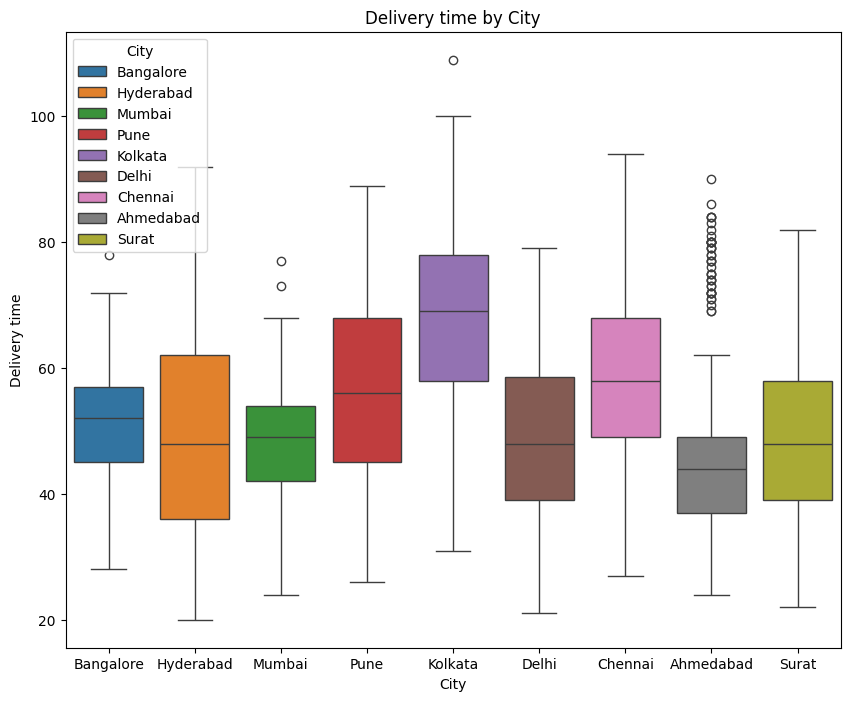

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='City', y='Delivery time', data=Swiggy , hue='City')
plt.title('Delivery time by City')
plt.xlabel('City')
plt.ylabel('Delivery time')
plt.show()

### This analysis seeks to examine the relationship between delivery times and average ratings in the Swiggy dataset to determine how delivery efficiency impacts customer satisfaction.

Explanation:

By employing a barplot to visualize the average ratings against delivery times, this analysis aims to reveal trends that may indicate how timely deliveries influence customer feedback. Understanding this relationship can provide valuable insights into customer preferences and help Swiggy optimize its delivery processes to enhance overall satisfaction.

Problem to Solve:

What is the correlation between delivery times and average ratings, and how can insights derived from this relationship inform strategies to improve customer satisfaction in the food delivery service?

<Axes: xlabel='Delivery time', ylabel='Avg ratings'>

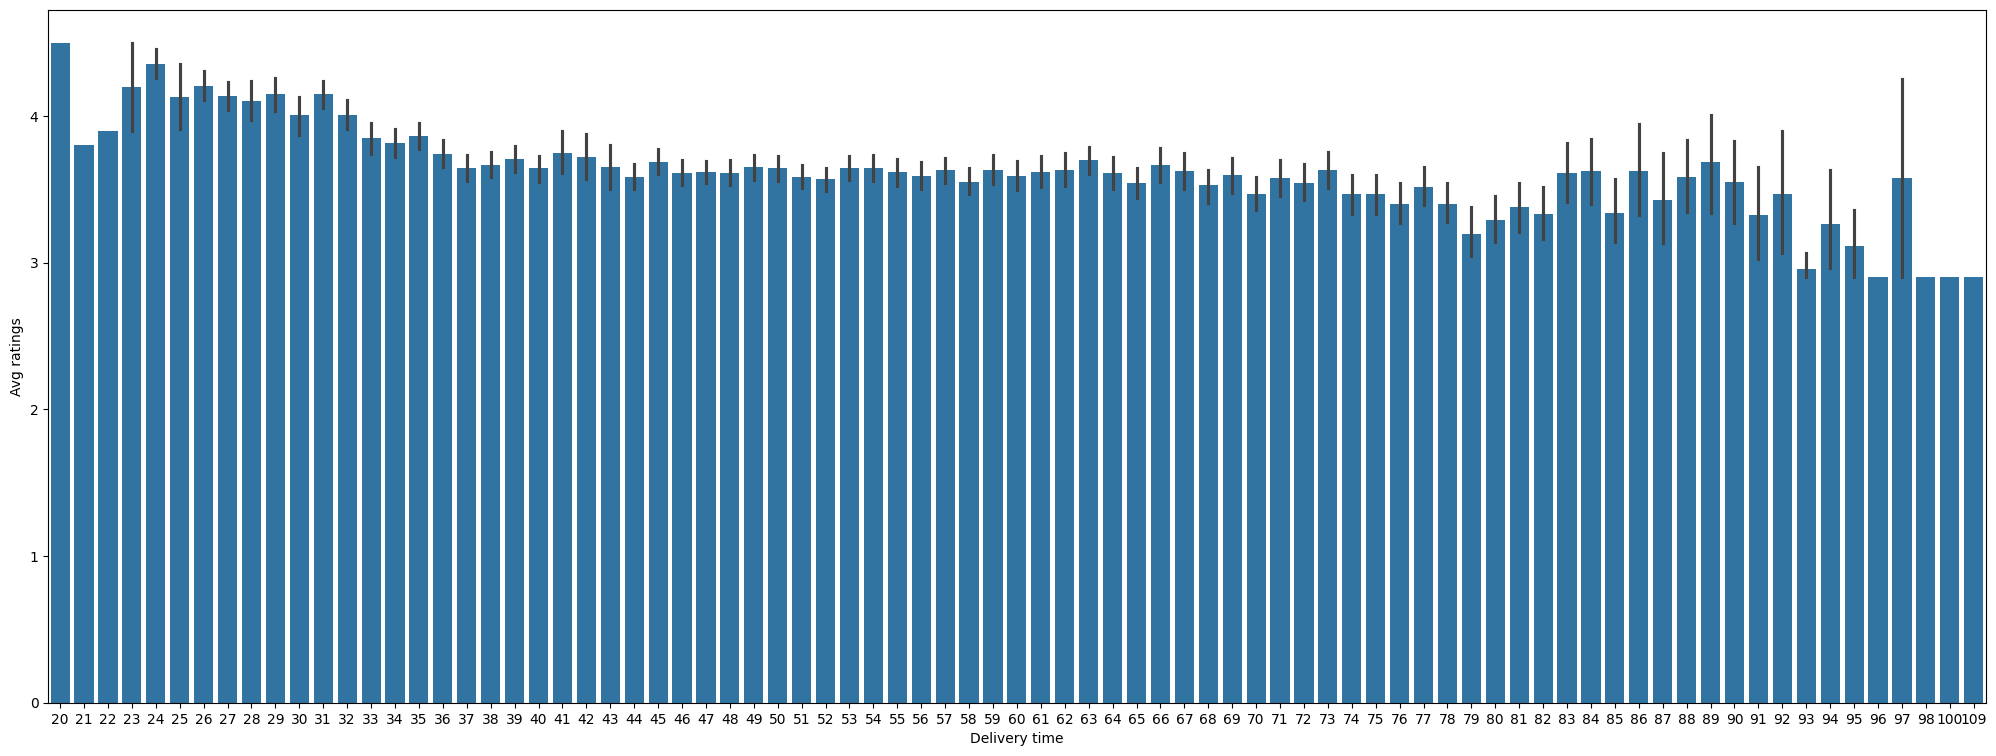

In [ ]:
plt.figure(figsize=(25,9))
sns.barplot(x = Swiggy['Delivery time'],y = Swiggy['Avg ratings'])

### This analysis aims to visualize the distribution of food orders across different cities in the Swiggy dataset using a pie chart to represent the frequency of orders in each city.

Explanation:

By plotting a pie chart of order frequencies, this analysis provides a clear representation of how orders are distributed among various cities. This visualization allows stakeholders to quickly identify which cities generate the most orders, offering insights into regional preferences and demand patterns.

Problem to Solve:

What is the distribution of food orders among different cities, and how can this information be utilized to optimize marketing and operational strategies for better service delivery in high-demand areas?

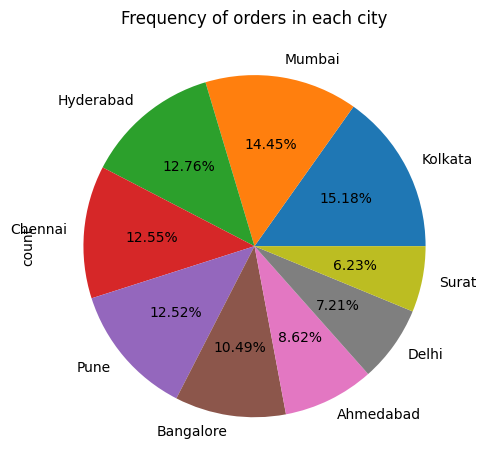

In [15]:
food_type_counts = Swiggy['City'].value_counts()
food_type_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Frequency of orders in each city')
plt.tight_layout()
plt.show()

### This analysis aims to explore the relationship between delivery times and average ratings in the Swiggy dataset using a heatmap to visualize the frequency of ratings across different delivery time intervals.

Explanation:

By creating a heatmap with a cross-tabulation of delivery times and average ratings, the analysis seeks to uncover patterns that reveal how delivery efficiency influences customer evaluations. This visualization allows for quick identification of areas where delivery times may correlate with higher or lower ratings, providing insights for operational improvements.

Problem to Solve:

How do delivery times affect the distribution of average ratings, and what patterns can be identified to inform strategies for enhancing customer satisfaction in the food delivery sector?








<Axes: xlabel='Avg ratings', ylabel='Delivery time'>

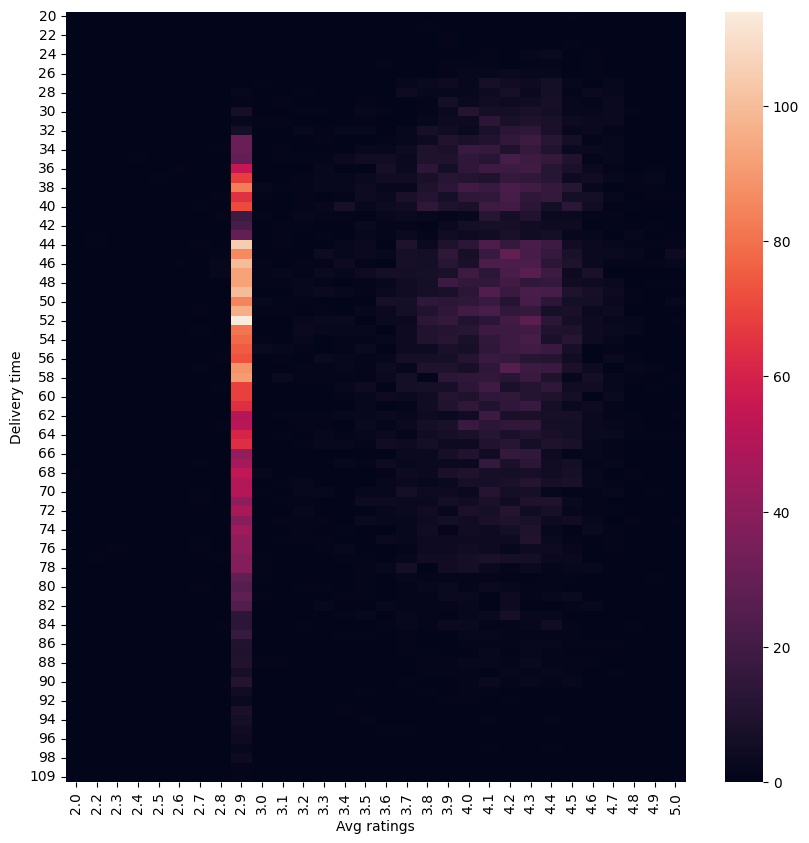

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(Swiggy['Delivery time'],Swiggy['Avg ratings']))

### This analysis aims to evaluate the relationships among key numerical variables in the Swiggy dataset—namely price, average ratings, total ratings, and delivery time—using a heatmap to visualize the correlation matrix.

Explanation:

By generating a heatmap of the correlation matrix, this analysis provides insights into how these variables interact with one another. Understanding these correlations can help identify potential factors influencing customer satisfaction and operational performance, guiding strategic decision-making for improving service quality.

Problem to Solve:

What are the significant correlations among price, average ratings, total ratings, and delivery time, and how can these insights be leveraged to enhance the overall performance of the food delivery service?

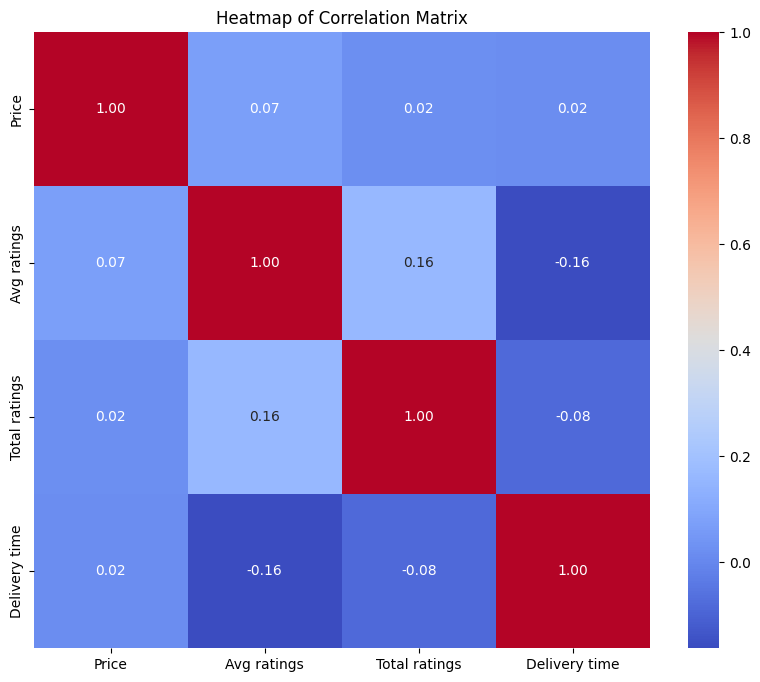

In [ ]:
numerical_data = Swiggy[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### This analysis aims to explore the relationships and distributions among key numerical variables in the Swiggy dataset by utilizing a pairplot to visualize pairwise relationships.

Explanation:

By generating a pairplot, this analysis provides a comprehensive view of how different variables, such as price, average ratings, total ratings, and delivery time, correlate with one another. This visualization helps in identifying trends, patterns, and potential outliers across the dataset, offering valuable insights for further analysis.

Problem to Solve:

What patterns and relationships can be identified among the numerical variables in the Swiggy dataset, and how can these insights inform strategies to optimize pricing, improve ratings, and enhance delivery efficiency?

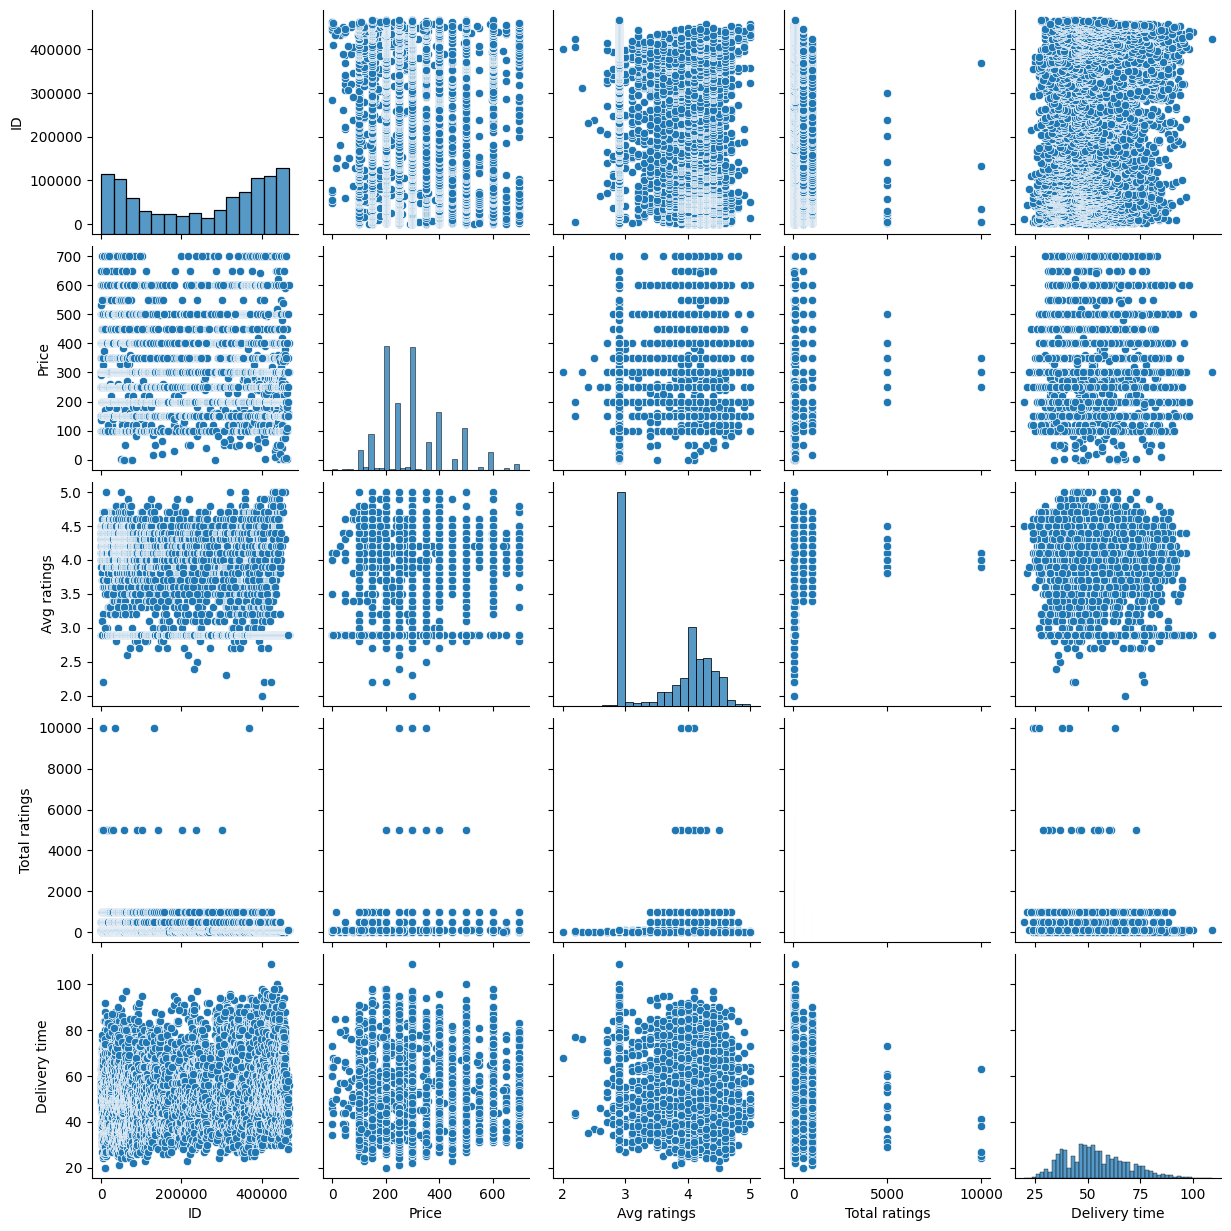

In [12]:
sns.pairplot(Swiggy)

### This analysis seeks to investigate the relationship between average ratings and price in the Swiggy dataset by examining the frequency distribution of ratings across different price points.

Explanation:

By using a cross-tabulation to display the relationship between average ratings and price, this analysis aims to reveal how pricing strategies may influence customer perceptions and satisfaction. The results can help identify trends and patterns in customer feedback based on different price categories.

Problem to Solve:

How does the distribution of average ratings vary across different price levels, and what insights can be drawn to inform pricing strategies that enhance customer satisfaction in the food delivery service?

In [ ]:
pd.crosstab(Swiggy['Avg ratings'],Swiggy['Price'])

Price,0.0,1.0,2.0,5.0,10.0,15.0,20.0,30.0,40.0,45.0,...,532.0,540.0,550.0,590.0,599.0,600.0,620.0,640.0,650.0,700.0
Avg ratings,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.9,2,3,2,1,2,0,2,1,2,1,...,0,1,8,1,1,82,1,0,9,29


In [11]:
pd.crosstab(Swiggy['Delivery time'],Swiggy['Price'])

Price,0.0,1.0,2.0,5.0,10.0,15.0,20.0,30.0,40.0,45.0,...,532.0,540.0,550.0,590.0,599.0,600.0,620.0,640.0,650.0,700.0
Delivery time,,,,,,,,,,,,,,,,,,,,,
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### This analysis aims to aggregate the total values of key metrics in the Swiggy dataset based on average ratings, providing a summary of how ratings influence overall performance.

Explanation:

By grouping the data by average ratings and summing the relevant metrics, this analysis seeks to identify trends that reveal how higher or lower ratings correlate with total values such as price and delivery metrics. This aggregated view can help stakeholders understand the impact of customer feedback on business performance.

Problem to Solve:

How do total values of key metrics vary with average ratings, and what insights can be drawn from this aggregation to inform strategies for improving customer satisfaction and operational efficiency in the food delivery service?

In [13]:
new = Swiggy.groupby('Avg ratings').sum().reset_index()
print(new)

    Avg ratings          ID  \
0           2.0      400503   
1           2.2      833913   
2           2.3      312035   
3           2.4      230452   
4           2.5      237526   
5           2.6      280120   
6           2.7     2761791   
7           2.8     2743574   
8           2.9  1082240608   
9           3.0     5090540   
10          3.1     6712616   
11          3.2    11360886   
12          3.3    11963418   
13          3.4    15493380   
14          3.5    19196248   
15          3.6    24540749   
16          3.7    40556016   
17          3.8    62287208   
18          3.9    75990547   
19          4.0    86361798   
20          4.1   116038599   
21          4.2   121096403   
22          4.3   115221503   
23          4.4    92225927   
24          4.5    55073521   
25          4.6    31375718   
26          4.7    19528597   
27          4.8     6561086   
28          4.9     4763430   
29          5.0     6474385   

                                      